# 4. BFS(Breadth-First search)
### 너비 우선 탐색. 가까운 노드부터 우선적으로 탐색(=최단거리 구할 때 사용)
### 동작과정
    -1. 탐색 시작 노드를 큐에 삽입하고 방문처리
    -2. 큐에서 노드를 꺼내고 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
    -3. 더 이상 2의 과정을 수행할 수 없을 때까지 반복

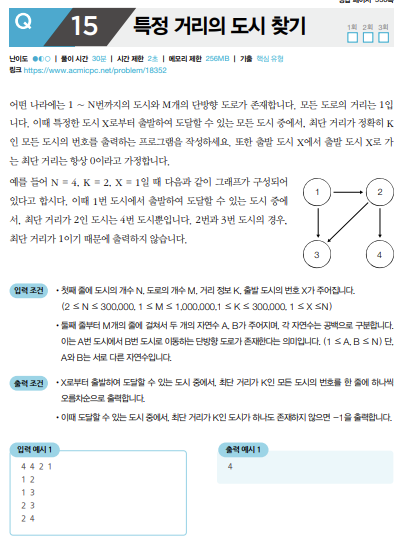

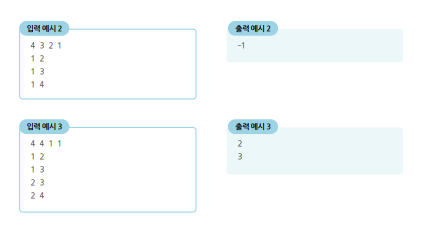

In [16]:
from collections import deque #bfs 풀이

n = int(input("도시의 개수 (2 <= N <= 300.000) : "))
m = int(input("단방향 도로의 개수 (1 <= M <= 1.000.000) : "))
k = int(input("최단거리 (2 <= K <= 300.000) : "))
x = int(input("출발 도시의 번호 (2 <= X <= N) : "))


# n+1개의 노드를 갖는 그래프 생성
g=[[] for i in range(n+1)]
for i in range(m):#도로 입력받기
    a,b=map(int,input().split())
    g[a].append(b)

print(g)


'''
visit 배열에서
미방문 = -1
방문 = 0
'''
visit = [-1] * (n+1)#노드 간 거리 -1로 초기화
visit[x] = 0#시작 노드의 거리는 0으로


            
q=deque([x]) #시작 노드
while q:
    start=q.popleft()#현재 노드 pop
    
    for i in g[start]:#현재 갈 수 있는 모든 노드 탐색
        if visit[i] == -1:#방문한적 없는 노드이면
            visit[i] = visit[start]+1#방문 처리
            q.append(i)
            
print(visit)            


## 그럼 이제 visit 배열에 방문처리가 표시가 되겠지!!            

tf = False # k거리에 해당하는 도시가 있는지 없는지 판별

for j in range(1,n+1):
    if visit[j] == k:
        print(j)
        tf=True#있음
        
if tf == False:#없다면 -1
    print(-1)
    



도시의 개수 (2 <= N <= 300.000) : 4
단방향 도로의 개수 (1 <= M <= 1.000.000) : 4
최단거리 (2 <= K <= 300.000) : 2
출발 도시의 번호 (2 <= X <= N) : 1
1 2
1 3
2 3
2 4
[[], [2, 3], [3, 4], [], []]
[-1, 0, 1, 1, 2]
-1
-1
-1
4


In [ ]:
'''
이론을 먼저 공부하고 문제를 풀어서 
BFS틀 자체를 구현하는것은 어려운점이 없었지만

그래프 모양을 가르쳐주는 수들을 입력받고
이것을
각 노드별 인접노드를 가지는
배열을 만드는 부분에서 조금 힘들었다!!

1 2
1 3
2 3
2 4

>>
 0     1        2    3    4
[[], [2, 3], [3, 4], [], []]



# n+1개의 노드를 갖는 그래프 생성
g=[[] for i in range(n+1)]
for i in range(m):#도로 입력받기
    a,b=map(int,input().split())
    g[a].append(b)

print(g)
'''


## 답지VER

In [1]:
from collections import deque

# 도시의 개수, 도로의 개수, 거리 정보, 출발 도시 번호
n, m, k, x = map(int, input().split())
graph = [[] for _ in range(n + 1)]

# 모든 도로 정보 입력 받기
for _ in range(m):
    a, b = map(int, input().split())
    graph[a].append(b)

# 모든 도시에 대한 최단 거리 초기화
distance = [-1] * (n + 1)
distance[x] = 0 # 출발 도시까지의 거리는 0으로 설정

# 너비 우선 탐색(BFS) 수행
q = deque([x])
while q:
    now = q.popleft()
    # 현재 도시에서 이동할 수 있는 모든 도시를 확인
    for next_node in graph[now]:
        # 아직 방문하지 않은 도시라면
        if distance[next_node] == -1:
            # 최단 거리 갱신
            distance[next_node] = distance[now] + 1
            q.append(next_node)

# 최단 거리가 K인 모든 도시의 번호를 오름차순으로 출력
check = False
for i in range(1, n + 1):
    if distance[i] == k:
        print(i)
        check = True

# 만약 최단 거리가 K인 도시가 없다면, -1 출력
if check == False:
    print(-1)


4 3 2 1
1 2
1 3
1 4
-1
